In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
x = df.drop(columns='target')
y = df['target']

# Task
Train a Decision Tree Classifier on the provided data, visualize the resulting tree, and evaluate the model's performance.

## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train model

### Subtask:
Train a Decision Tree Classifier on the training data.


**Reasoning**:
Import the Decision Tree Classifier and train the model using the training data.



In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## Visualize tree

### Subtask:
Visualize the trained decision tree.


**Reasoning**:
Visualize the trained decision tree using plot_tree and display the plot.



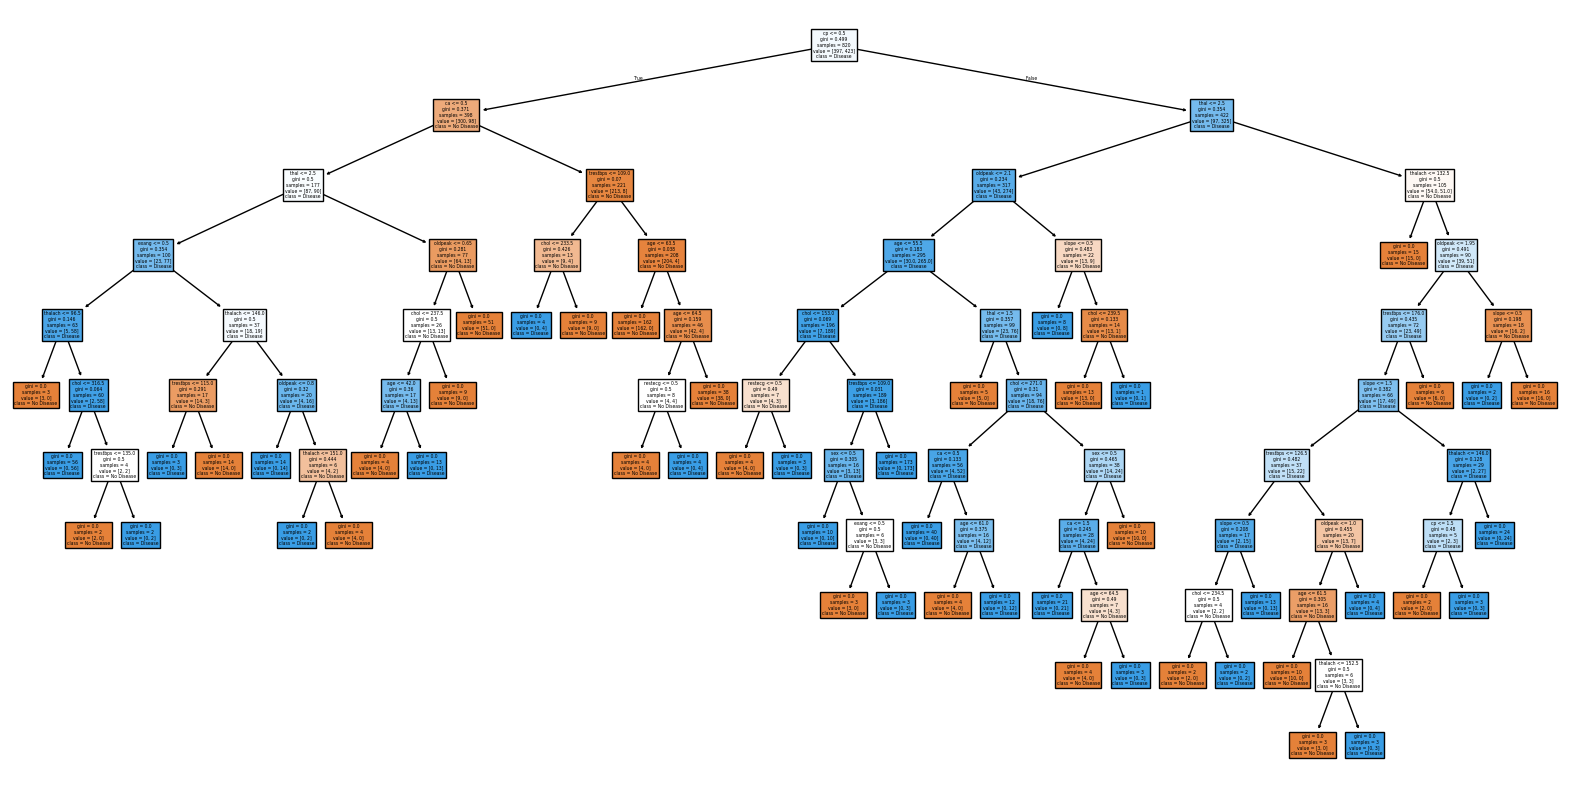

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=x.columns.tolist(), class_names=['No Disease', 'Disease'])
plt.show()

## Evaluate model

### Subtask:
Evaluate the model performance on the test data.


**Reasoning**:
Import necessary metrics, make predictions, and calculate evaluation scores.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = dt_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1-score: 0.9852


## Summary:

### Data Analysis Key Findings

*   The data was split into training and testing sets with 80% for training and 20% for testing.
*   A Decision Tree Classifier was trained on the training data.
*   The trained decision tree was successfully visualized, showing the decision nodes and leaves.
*   The model performance on the test data resulted in an accuracy of 0.9854, a precision of 1.0000, a recall of 0.9709, and an F1-score of 0.9852.

### Insights or Next Steps

*   The high precision score suggests that when the model predicts the positive class ('Disease'), it is very likely to be correct.
*   Consider exploring techniques like pruning or setting hyperparameters for the Decision Tree to potentially improve recall without significantly impacting precision, if the cost of false negatives is high.


 **1.How does a decision tree work?**
 A decision tree is a flowchart-like structure where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a predicted value (in regression). The algorithm works by recursively splitting the data based on the feature that provides the best separation of the data into different classes or values.

 **2.What is entropy and information gain?**

Entropy: In the context of decision trees, entropy is a measure of impurity or randomness in a set of data. A dataset with high entropy is mixed (e.g., contains instances of multiple classes), while a dataset with low entropy is relatively pure (e.g., contains mostly instances of a single class).
Information Gain: Information gain is the reduction in entropy achieved by splitting the data on a particular feature. Decision tree algorithms use information gain to decide which feature to split on at each node. The feature that results in the highest information gain is chosen because it best separates the data into more homogeneous subsets.

**3.How is random forest better than a single tree?**

 A Random Forest is an ensemble of multiple decision trees. It is often better than a single decision tree because it reduces the risk of overfitting and improves generalization. This is achieved through:

**5.What is bagging?**
Bagging (Bootstrap Aggregating): Each tree in the forest is trained on a random subset of the training data (with replacement).
Random Subspace: Each tree is trained on a random subset of the features. By combining the predictions of multiple trees trained on different subsets of data and features, the Random Forest averages out the errors and biases of individual trees, leading to a more robust and accurate model.

 **4.What is overfitting and how do you prevent it?**
  Overfitting occurs when a model learns the training data too well, including the noise and outliers, which results in poor performance on unseen data. It essentially memorizes the training data instead of learning the underlying patterns.

To prevent overfitting in Decision Trees and Random Forests, you can use techniques such as:

Pruning: Removing branches from the tree that have little predictive power.
Setting hyperparameters: Limiting the maximum depth of the tree, the minimum number of samples required to split an internal node, or the minimum number of samples required to be at a leaf node.
Cross-validation: Using techniques like k-fold cross-validation to get a more reliable estimate of the model's performance on unseen data and to tune hyperparameters.
Bagging and Random Subspace: As used in Random Forests, these techniques introduce randomness that helps to reduce the correlation between individual trees and thus reduce overfitting.
What is bagging? Bagging (Bootstrap Aggregating) is an ensemble technique where multiple models of the same type are trained on different bootstrap samples (random samples with replacement) of the training data. The predictions of these individual models are then combined (e.g., averaged for regression, majority vote for classification) to produce a final prediction. Bagging helps to reduce variance and improve the stability of the model.


 **6.How do you visualize a decision tree?**
  In Python, you can visualize a Decision Tree using libraries like matplotlib and sklearn.tree.plot_tree. The plot_tree function takes the trained decision tree model, feature names, and class names as input and generates a plot representing the tree structure. You can see an example of this in the notebook cell ca26cef3.


 **7.How do you interpret feature importance?**
  Feature importance in a decision tree (or Random Forest) indicates how much each feature contributes to the model's predictions. Features that are used to make splits higher up in the tree and that result in significant information gain are considered more important. You can typically get feature importance scores from the trained model object (e.g., using the feature_importances_ attribute in scikit-learn). A higher score for a feature means it has a stronger influence on the target variable.

 **8.What are the pros/cons of random forests?**
Pros:
High accuracy and robustness.
Reduces overfitting compared to single decision trees.
Can handle large datasets with many features.
Provides estimates of feature importance.
Less sensitive to outliers than some other algorithms.
Cons:

Can be computationally expensive and slow to train, especially with a large number of trees.
The model is less interpretable than a single decision tree (it's a "black box").
May not perform well on very sparse data.
I hope these explanations are helpful! Let me know if you have more questions or would like to explore any of these topics further.



